In [1]:
# Enable interactive plot
%matplotlib notebook

import sys, time
import os.path
import argparse
import numpy as np
import h5py
import scipy.constants as sc
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## plot the fields of the optical beam

In [2]:
filename = "../fel1d.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
fields = hdf['InteractionField']
# print(fields.attrs.keys())
N_field = fields.attrs['N_field']
N_steps = fields.attrs['N_steps']
dt = fields.attrs['dt']
prop = np.array([fields.attrs['prop.x'], fields.attrs['prop.y'], fields.attrs['prop.z']])
origin = np.array([fields.attrs['origin.x'], fields.attrs['origin.y'], fields.attrs['origin.z']])
print(f'field size = {N_field},  steps = {N_steps},  dt = {dt:.4g} s')
print('propagation step = ',prop)
print('origin position = ',origin)

a = np.array(fields)
hdf.close()

print(f'have read {a.shape} array.')


reading  ../fel1d.hdf5

field size = 4000,  steps = 1502,  dt = 3.336e-14 s
propagation step =  [-0.e+00 -0.e+00 -1.e-05]
origin position =  [0.         0.         0.01498962]
have read (1502, 4000) array.


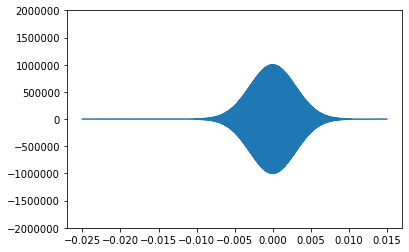

In [106]:
%matplotlib inline

E_x = np.array(a[1000])
t = dt*np.arange(E_x.shape[0])
z = origin[2] + prop[2]*np.arange(E_x.shape[0])

plt.plot(z,E_x)
plt.ylim(-2e6,2e6)
plt.show()

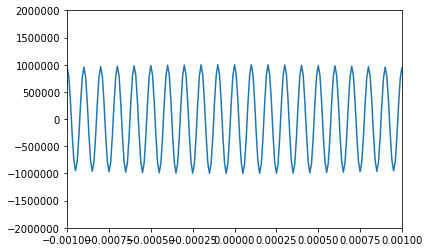

In [4]:
%matplotlib inline

E_x = np.array(a[0])
t = dt*np.arange(E_x.shape[0])
z = origin[2] + prop[2]*np.arange(E_x.shape[0])

plt.plot(z,E_x)
plt.xlim(-0.001,0.001)
plt.ylim(-2e6,2e6)
plt.show()

<IPython.core.display.Javascript object>


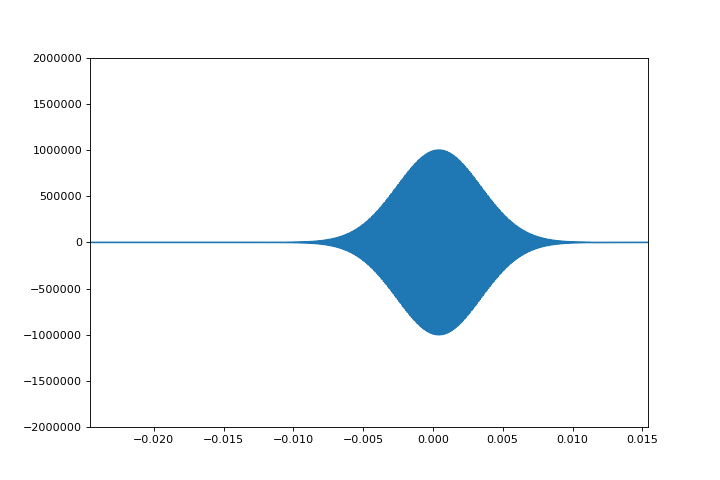

In [5]:
%matplotlib notebook

E_x = np.array(a[0])
z = origin[2] + prop[2]*np.arange(E_x.shape[0])

fig, ax = plt.subplots(figsize=(9,6))
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(z[-1], z[0])
ax.set_ylim(-2e6, 2e6)
# anno = ax.text(0.75 ,0.85, f'c*t = {t_head*sc.c:.6f} m', transform=ax.transAxes, size=14)

def step(frame_num):
    global a, z, E_x, ax, line, origin, prop
    z = origin[2] + prop[2]*(np.arange(E_x.shape[0])-frame_num)
    E_x = np.array(a[frame_num])
    line.set_data((z, E_x))
    ax.set_xlim(z[-1], z[0])
    # anno.set_text(f'c*t = {t_head*sc.c:.6f} m')
    return line

# anim = FuncAnimation(fig, step, frames=150, interval=100, repeat=False, blit=True)
anim = FuncAnimation(fig, step, frames=150, interval=100)

plt.show()

In [11]:
anim.save('animation.gif', writer='imagemagick', fps=20)

## plot the particle trajectories

In [12]:
filename = "../fel1d_trajectories.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
group = hdf['Trajectories']
print(group.attrs.keys())
N_step = group.attrs['NOTS']
N_part = group.attrs['NOP']

coordinates = np.array(group)
hdf.close()

print(f'have read {coordinates.shape} array.')


reading  ../fel1d_trajectories.hdf5

<KeysViewHDF5 ['NOP', 'NOTS']>
have read (1502, 20, 6) array.


In [21]:
# expected energy gain/loss per period
λ_U = 0.1
E0 = 1e6
γ = 58.71
K = 3.433
λ = λ_U/(2*γ**2)*(1+K**2/2)
print(f'λ = {1e6*λ} µm')
Δγ = sc.e / (sc.m_e*sc.c**2) * E0 * K/γ * λ_U/2
print(f'Δγ = {Δγ:.6f} / period')
bx_max = 2*np.sqrt(λ/λ_U-1/(2*γ**2))
print(f'β_x, max = {K/γ:.6f}')

λ = 99.98573050791296 µm
Δγ = 0.005722 / period
β_x, max = 0.058474


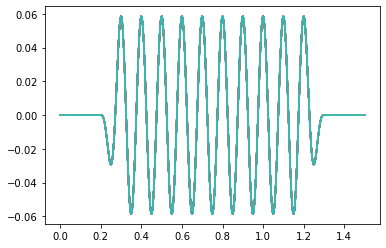

In [16]:
%matplotlib inline

for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    plt.plot(z,bgx/gamma)
    
plt.show()

0.04206829358973607 58.66764773948752 58.75178432666699


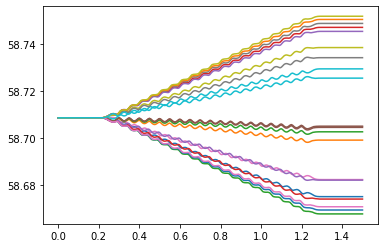

In [24]:
%matplotlib inline

gam_list = []
for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    gam_list.append(gamma[-1])
    plt.plot(z,gamma)
    
gmin = np.min(gam_list)
gmax = np.max(gam_list)
print((gmax-gmin)/2, gmin, gmax)
plt.show()

In [3]:
sc.e

1.6021766208e-19

In [5]:
sc.m_e*sc.c**2

8.187105649650028e-14

In [6]:
sc.m_e*sc.c**2 / sc.e

510998.94626861025

In [25]:
filename = "../wave_interaction_traj.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
group = hdf['Trajectories']
print(group.attrs.keys())
N_step = group.attrs['NOTS']
N_part = group.attrs['NOP']

coordinates = np.array(group)
hdf.close()

print(f'have read {coordinates.shape} array.')


reading  ../wave_interaction_traj.hdf5

<KeysViewHDF5 ['NOP', 'NOTS']>
have read (4001, 100, 12) array.


In [26]:
# expected energy gain/loss per period
λ_U = 0.1
E0 = 1e6
γ = 58.71
K = 3.433
λ = λ_U/(2*γ**2)*(1+K**2/2)
print(f'λ = {1e6*λ} µm')
Δγ = sc.e / (sc.m_e*sc.c**2) * E0 * K/γ * λ_U/2
print(f'Δγ = {Δγ:.6f} / period')
bx_max = 2*np.sqrt(λ/λ_U-1/(2*γ**2))
print(f'β_x, max = {K/γ:.6f}')

λ = 99.98573050791296 µm
Δγ = 0.005722 / period
β_x, max = 0.058474


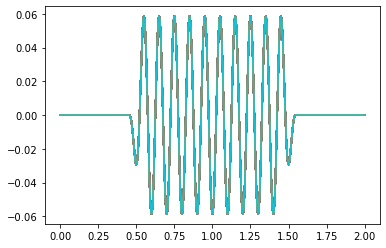

In [27]:
%matplotlib inline

for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    plt.plot(z,bgx/gamma)
    
plt.show()

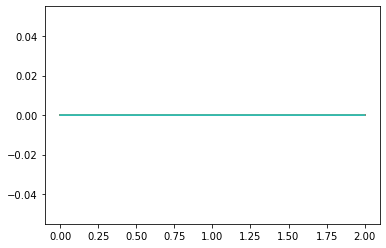

In [28]:
%matplotlib inline

for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    Ex = p1[:,6]
    Ey = p1[:,7]
    Ez = p1[:,8]
    plt.plot(z,Ex)
    plt.plot(z,Ey)
    plt.plot(z,Ez)
    
plt.show()

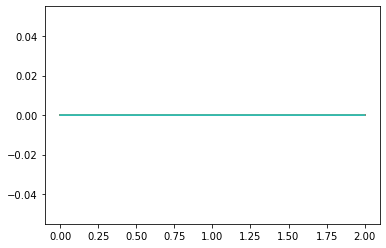

In [29]:
%matplotlib inline

for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    Bx = p1[:,9]
    By = p1[:,10]
    Bz = p1[:,11]
    plt.plot(z,Bx)
    plt.plot(z,By)
    plt.plot(z,Bz)
    
plt.show()

0.04299921283153907 58.665524490481836 58.751522916144914


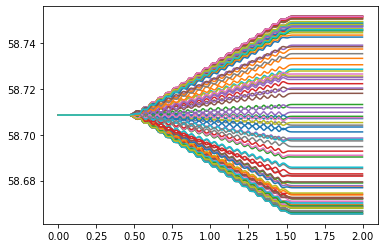

In [30]:
%matplotlib inline

gam_list = []
for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    gam_list.append(gamma[-1])
    plt.plot(z,gamma)
    
gmin = np.min(gam_list)
gmax = np.max(gam_list)
print((gmax-gmin)/2, gmin, gmax)
plt.show()

In [31]:
filename = "../master.log"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
group = hdf['Trajectories']
print(group.attrs.keys())
N_step = group.attrs['NOTS']
N_part = group.attrs['NOP']

coordinates = np.array(group)
hdf.close()

print(f'have read {coordinates.shape} array.')


reading  ../master.log

<KeysViewHDF5 ['NOP', 'NOTS']>
have read (4001, 100, 12) array.


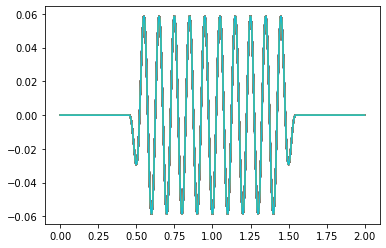

In [32]:
%matplotlib inline

for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    plt.plot(z,bgx/gamma)
    
plt.show()

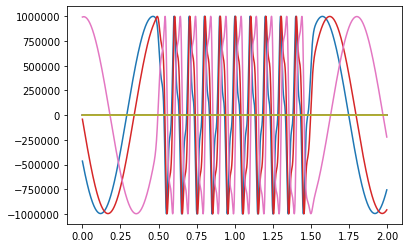

In [34]:
%matplotlib inline

for i in range(3):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    Ex = p1[:,6]
    Ey = p1[:,7]
    Ez = p1[:,8]
    plt.plot(z,Ex)
    plt.plot(z,Ey)
    plt.plot(z,Ez)
    
plt.show()

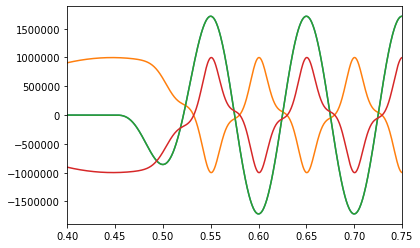

In [45]:
%matplotlib inline

for i in [12,89]:
    p1 = coordinates[:,i,:]
    z = p1[:,2]
    bgx = p1[:,3]
    Ex = p1[:,6]
    plt.plot(z,0.5e6*bgx)
    plt.plot(z,Ex)

plt.xlim(0.4,0.75)
plt.show()

0.042993801629769735 58.66552444082505 58.75151204408459


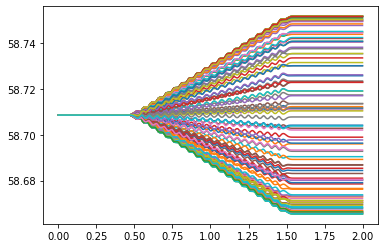

In [38]:
%matplotlib inline

gam_list = []
for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    gam_list.append(gamma[-1])
    plt.plot(z,gamma)
    
gmin = np.min(gam_list)
gmax = np.max(gam_list)
print((gmax-gmin)/2, gmin, gmax)
plt.show()

In [39]:
gam_list.index(gmin)

89

In [40]:
gam_list.index(gmax)

12

In [46]:
filename = "../master.log"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
group = hdf['Trajectories']
print(group.attrs.keys())
N_step = group.attrs['NOTS']
N_part = group.attrs['NOP']

coordinates = np.array(group)
hdf.close()

print(f'have read {coordinates.shape} array.')


reading  ../master.log

<KeysViewHDF5 ['NOP', 'NOTS']>
have read (4001, 100, 12) array.


60 6
0.04139088515823275 39.09766299753293 39.180444767849394


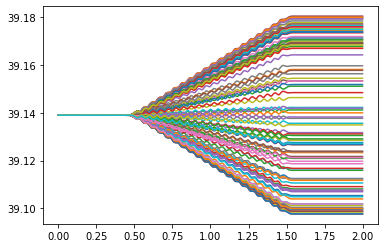

In [49]:
%matplotlib inline

gam_list = []
for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    gam_list.append(gamma[-1])
    plt.plot(z,gamma)
    
gmin = np.min(gam_list)
gmax = np.max(gam_list)
print(gam_list.index(gmin), gam_list.index(gmax))
print((gmax-gmin)/2, gmin, gmax)
plt.show()

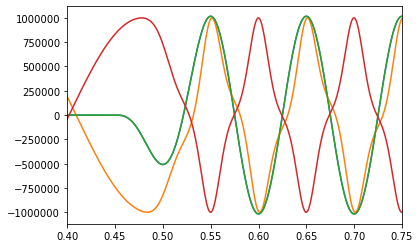

In [50]:
%matplotlib inline

for i in [60,6]:
    p1 = coordinates[:,i,:]
    z = p1[:,2]
    bgx = p1[:,3]
    Ex = p1[:,6]
    plt.plot(z,0.5e6*bgx)
    plt.plot(z,Ex)

plt.xlim(0.4,0.75)
plt.show()

In [51]:
filename = "../master.log"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
group = hdf['Trajectories']
print(group.attrs.keys())
N_step = group.attrs['NOTS']
N_part = group.attrs['NOP']

coordinates = np.array(group)
hdf.close()

print(f'have read {coordinates.shape} array.')


reading  ../master.log

<KeysViewHDF5 ['NOP', 'NOTS']>
have read (4001, 100, 12) array.


1 9
0.04313156695360476 97.80441621103382 97.89067934494103


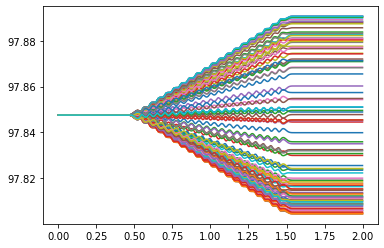

In [52]:
%matplotlib inline

gam_list = []
for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    gam_list.append(gamma[-1])
    plt.plot(z,gamma)
    
gmin = np.min(gam_list)
gmax = np.max(gam_list)
print(gam_list.index(gmin), gam_list.index(gmax))
print((gmax-gmin)/2, gmin, gmax)
plt.show()

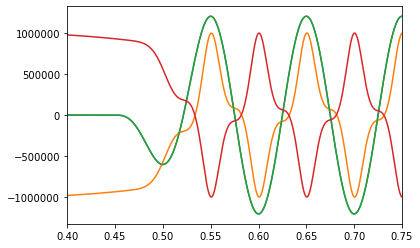

In [54]:
%matplotlib inline

for i in [1,9]:
    p1 = coordinates[:,i,:]
    z = p1[:,2]
    bgx = p1[:,3]
    Ex = p1[:,6]
    plt.plot(z,0.2e6*bgx)
    plt.plot(z,Ex)

plt.xlim(0.4,0.75)
plt.show()

In [63]:
filename = "../master.log"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
group = hdf['Trajectories']
print(group.attrs.keys())
N_step = group.attrs['NOTS']
N_part = group.attrs['NOP']

coordinates = np.array(group)
hdf.close()

print(f'have read {coordinates.shape} array.')


reading  ../master.log

<KeysViewHDF5 ['NOP', 'NOTS']>
have read (4001, 100, 12) array.


95 12
0.03286323436532612 27.364491949538476 27.430218418269128


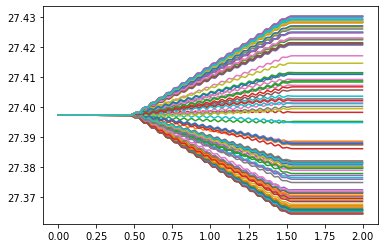

In [64]:
%matplotlib inline

gam_list = []
for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    gam_list.append(gamma[-1])
    plt.plot(z,gamma)
    
gmin = np.min(gam_list)
gmax = np.max(gam_list)
print(gam_list.index(gmin), gam_list.index(gmax))
print((gmax-gmin)/2, gmin, gmax)
plt.show()

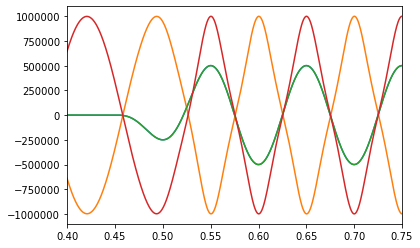

In [66]:
%matplotlib inline

for i in [12,95]:
    p1 = coordinates[:,i,:]
    z = p1[:,2]
    bgx = p1[:,3]
    Ex = p1[:,6]
    plt.plot(z,0.5e6*bgx)
    plt.plot(z,Ex)

plt.xlim(0.4,0.75)
plt.show()

Für unterschiedliche K und unterschiedliche Energien (bei gleicher Wellenlänge) ergeben sich
leicht unterschiedliche Energieüberträge. Allerdings liefert die Formel Werte, die die Variation
deutlich überschätzt. Ursache sind die unterschiedlichen Wellenformen der vom Teilchen gefühlten Felder.

In [62]:
E = np.array([14.0,20.0,30.0,50.0])
γ = E / 0.511
λ_U = 0.100
λ = 100.0e-6

# peak K
K = np.sqrt(2) * np.sqrt(λ/λ_U * 2 * γ**2 -1.0)
print(K)

Δγ = sc.e / (sc.m_e*sc.c**2) * E0 * K/γ * λ_U/2
print(Δγ)


[1.001219   2.03160713 3.43317811 6.02465119]
[0.00357579 0.00507903 0.00572198 0.00602466]
